In [1]:
from astropy.io import fits
from astropy.table import Table
import astropy.table as table

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib

from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.utils.data import get_pkg_data_filename

from astropy.coordinates import SkyCoord

In [2]:
#Make a histogram of proper motions from the Orion star-forming region

In [3]:
filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

gaiaHDU = fits.open('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/gaiadr2_OrionTables.fits')
gTab=Table(gaiaHDU[1].data)

gaiaConfHDU = fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\conf_in_gaiadr2_oriontables.fits')
gaiaConfTab = Table(gaiaConfHDU[1].data)
Mg_all = np.array([G + 5 - 5*(np.log10(1000/p)) for G, p in zip(gaiaConfTab['phot_g_mean_mag'], gaiaConfTab['parallax'])])
ii=[]
for i in range(len(gaiaConfTab)):
    if( (Mg_all[i]<2.46*(gaiaConfTab['bp_rp'][i])+2.76 and .3<(gaiaConfTab['bp_rp'][i])<1.8)
       or (Mg_all[i]<2.8*(gaiaConfTab['bp_rp'][i])+2.16 and 1.8<(gaiaConfTab['bp_rp'][i]))):
        ii.append(i)
gaiaConfTab = gaiaConfTab[ii]

confTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/oriona-allmembers.fits')

wTrap = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wTrap.fits')
wOB = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wOB.fits')
wOther = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wElse.fits')


OBTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/ob_ori.fits')

masterHDU = fits.open('C://users//sahal//2018TrinaryWork//TrinaryStarSearch/Data//masterconfirmedtable_1.fits')
mTab = Table(masterHDU[1].data)

thOriA = SkyCoord('5h35m15.8290940s','-05d23m14.153141s', frame = 'icrs')
thOriB = SkyCoord('05h35m16.112s','-05d23 m06.89s', frame = 'icrs')
thOriC = SkyCoord('05h35m16.46375s', '-05d23m22.8486s', frame = 'icrs')
thOriD = SkyCoord('05h35m17.19248s', '-05d23m15.5661s', frame = 'icrs')
traptab = Table([[thOriA.ra.deg,thOriB.ra.deg, thOriC.ra.deg, thOriD.ra.deg],
                [thOriA.dec.deg, thOriB.dec.deg,thOriC.dec.deg, thOriD.dec.deg],
                [1.81,-.9,-4.13,-7.11],[-1.62,.1,6.82,8.29]],
               names =('ra','dec','pmra','pmdec'))

In [4]:
avgPmra = np.mean(gaiaConfTab['pmra'])
avgPmdec = np.mean(gaiaConfTab['pmdec'])

trapRa = np.mean(traptab['ra'])
trapDec = np.mean(traptab['dec'])

In [5]:
pmra_corr = gaiaConfTab['pmra']-avgPmra
pmdec_corr = gaiaConfTab['pmdec']-avgPmdec

ra_pos = -(gaiaConfTab['ra_1']-trapRa)
dec_pos = -(gaiaConfTab['dec_1']-trapDec)

ctheta = []
for i in range(len(gaiaConfTab)):
    posVec = np.array([ra_pos[i], dec_pos[i]])
    pmVec = np.array([pmra_corr[i], pmdec_corr[i]])
    cth = np.dot(posVec, pmVec) / (np.sqrt(np.dot(posVec, posVec))*np.sqrt(np.dot(pmVec,pmVec)))
    ctheta.append(cth)
theta = np.arccos(np.array(ctheta))*180/np.pi

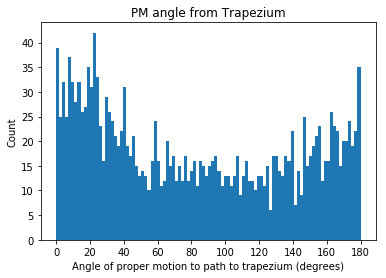

In [57]:
plt.hist(theta, bins = 100, range = (0,180))
plt.title('PM angle from Trapezium')
plt.xlabel('Angle of proper motion to path to trapezium (degrees)')
plt.ylabel('Count')
plt.xticks(np.linspace(0,180,10))
plt.show()

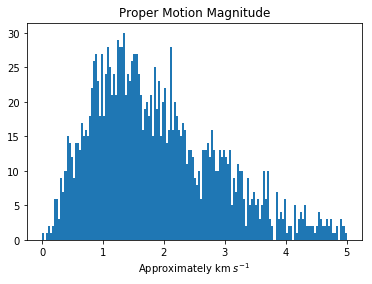

In [12]:
plt.hist(np.sqrt(pmra_corr**2 +pmdec_corr**2)*2, bins = 150,range = (0,5))
plt.title('Proper Motion Magnitude')
plt.xlabel('Approximately km $s^{-1}$')
plt.show()